<a href="https://colab.research.google.com/github/RustamChib/Graduation-Project-Fine-Indoor-Localization-Using-IMU-and-WiFi-Fusion/blob/RustamChib-patch-1/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [114]:
import pandas as pd
import glob

path = '/content/drive/MyDrive/Graduation Project/samsung_5th_floor/new/train'
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
data = frame.to_numpy()
print(data.shape)

(90044, 232)


In [178]:
X_train = data[:,0:222]
Y_train = data[:,229:232]
print(X_train.shape)
print(Y_train.shape)
path_test = '/content/drive/MyDrive/Graduation Project/samsung_5th_floor/new/test/DATA_23112020_044558.csv'
df_test = pd.read_csv(path_test, low_memory = True) 
data_test = df_test.to_numpy()
X_test = data_test[:,0:222]
Y_test = data_test[:,229:232]
print('-----------')
print(X_test.shape)
print(Y_test.shape)

(90044, 222)
(90044, 3)
-----------
(5941, 222)
(5941, 3)


Feature scaling (NOT USE)


In [ ]:
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

print(np.max(X_train))
print(np.min(X_train))

print(np.max(X_test))
print(np.min(X_test))


42.09559615549205
-1.162890179660639
11.24907403596699
-2.1658407823851205


Feature scaling Mukhamet

In [123]:
import numpy as np
import math
def normalize(X: np.ndarray, default_val: float, mode: int) -> np.ndarray:
    '''
    Normalizes the data given the mode
    Arguments:
    X           -- values to normalize
    default_val -- replaces NaNs
    mode        -- 0 - none, 1 - positive, 2 - zero-to-one, 3 - powed normalization
    Returns:
    X           -- normalized data or throws an exception
    '''
    if mode == 0:
        X = X
    elif mode == 1:
        X += default_val
    elif mode == 2:
        X += default_val
        X /= default_val
    elif mode == 3:
        X += default_val
        X /= default_val
        X = np.power(X, math.exp(1))
    else:
        raise IOError("invalid normalization mode")
    return X

Normalization

In [179]:
X_train_normalized = normalize(X_train, 100, 0)
X_test_normalized = normalize(X_test, 100, 0)
print(np.max(X_train_normalized))
print(np.min(X_train_normalized))

print(np.max(X_test_normalized))
print(np.min(X_test_normalized))

3.2308662
-90.0
0.9450085
-90.0


In [180]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(algorithm='auto',leaf_size=80, n_neighbors=19, metric='minkowski', p = 1)
model.fit(X_train_normalized, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=80, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                    weights='uniform')

In [181]:
y_pred = model.predict(X_test_normalized)

Checking the best K neighbors

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(algorithm='auto',leaf_size=80, n_neighbors=K, metric='minkowski', p = 1)

    model.fit(X_train_normalized, Y_train)  #fit the model
    pred=model.predict(X_test_normalized) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.0149330235727834
RMSE value for k=  2 is: 2.008900467700929
RMSE value for k=  3 is: 2.008821348315617
RMSE value for k=  4 is: 2.006166676815174
RMSE value for k=  5 is: 2.00392138862824
RMSE value for k=  6 is: 2.0035827199818694
RMSE value for k=  7 is: 2.0029310549878576
RMSE value for k=  8 is: 2.003759744949319
RMSE value for k=  9 is: 2.0035192948760767
RMSE value for k=  10 is: 2.0038148694333233
RMSE value for k=  11 is: 2.0036582115752015
RMSE value for k=  12 is: 2.00323935834235
RMSE value for k=  13 is: 2.0032015587878105
RMSE value for k=  14 is: 2.003443836160064
RMSE value for k=  15 is: 2.0036570817769572
RMSE value for k=  16 is: 2.003115836045688
RMSE value for k=  17 is: 2.002732494379286
RMSE value for k=  18 is: 2.002451537580813
RMSE value for k=  19 is: 2.002226990951001
RMSE value for k=  20 is: 2.0023837559231232


In [182]:
from scipy.spatial import distance

euclidean_sum = 0
N = len(Y_test)

for i in range (N):
  a = Y_test[[i], :]
  b = y_pred[[i], :]
  
  dst = distance.euclidean(a,b)
  euclidean_sum += dst
 
print(euclidean_sum/N)

2.9251878670512586


(5941, 1)
(5941, 1)


Text(30, 10, '2.9251878670512586')

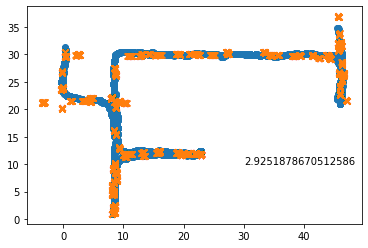

In [184]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from numpy import random
from IPython.display import Image

X_position_test = Y_test[:, [0]]
Y_position_test = Y_test[:, [1]]
X_position_pred = y_pred[:, [0]]
Y_position_pred = y_pred[:, [1]]
print(X_position_test.shape)
print(Y_position_test.shape)

plt.scatter(X_position_test, Y_position_test)
plt.scatter(X_position_pred, Y_position_pred, marker = 'x')

text(30,10,euclidean_sum/N)
#plt.show()
